In [2]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
# Declare each array as a variable. lats and lngs

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Pack the latitudes and longitudes as pairs by zipping them (lat_lngs) with the zip() function.
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.

lat_lngs = zip(lats, lngs)

lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.

from citipy import citipy

In [6]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

610

In [7]:
# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 

import time

# Import the datetime module from the datetime library.

from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")


# Create counters.

record_count = 1

set_count = 1

# Loop through all the cities in the list.

for i, city in enumerate(cities):
    

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        

    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")
    

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        
        print("City not found. Skipping...")
        
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | portland
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | avera
Processing Record 4 of Set 1 | kokoda
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | laguna
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | muzhi
Processing Record 11 of Set 1 | dingle
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | tessalit
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | abohar
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | codrington
Processing Record 22 of Set 1 | barentsburg
Cit

Processing Record 39 of Set 4 | ivanishchi
Processing Record 40 of Set 4 | jajce
Processing Record 41 of Set 4 | torbay
Processing Record 42 of Set 4 | northam
Processing Record 43 of Set 4 | bundaberg
Processing Record 44 of Set 4 | lasa
Processing Record 45 of Set 4 | gulu
Processing Record 46 of Set 4 | kjopsvik
Processing Record 47 of Set 4 | tuatapere
Processing Record 48 of Set 4 | kyshtovka
Processing Record 49 of Set 4 | sirsa
Processing Record 50 of Set 4 | isheyevka
Processing Record 1 of Set 5 | buraydah
Processing Record 2 of Set 5 | morro bay
Processing Record 3 of Set 5 | hobyo
Processing Record 4 of Set 5 | payo
Processing Record 5 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 5 | san cristobal
Processing Record 7 of Set 5 | kamenka
Processing Record 8 of Set 5 | oshikango
Processing Record 9 of Set 5 | tayoltita
Processing Record 10 of Set 5 | hambantota
Processing Record 11 of Set 5 | darnah
Processing Record 12 of Set 5 | formosa do rio

Processing Record 34 of Set 8 | tubuala
Processing Record 35 of Set 8 | bushehr
Processing Record 36 of Set 8 | toliary
City not found. Skipping...
Processing Record 37 of Set 8 | surgut
Processing Record 38 of Set 8 | krasnoselkup
Processing Record 39 of Set 8 | rajsamand
Processing Record 40 of Set 8 | lompoc
Processing Record 41 of Set 8 | ilhabela
Processing Record 42 of Set 8 | norman wells
Processing Record 43 of Set 8 | tadine
Processing Record 44 of Set 8 | fontenay-le-comte
Processing Record 45 of Set 8 | verkhnedneprovskiy
Processing Record 46 of Set 8 | jabiru
City not found. Skipping...
Processing Record 47 of Set 8 | la ronge
Processing Record 48 of Set 8 | sanming
Processing Record 49 of Set 8 | ballina
Processing Record 50 of Set 8 | lorengau
Processing Record 1 of Set 9 | waipawa
Processing Record 2 of Set 9 | naantali
Processing Record 3 of Set 9 | panikian
Processing Record 4 of Set 9 | sinnamary
Processing Record 5 of Set 9 | dawlatabad
Processing Record 6 of Set 9 |

Processing Record 21 of Set 12 | zhigansk
Processing Record 22 of Set 12 | yumen
Processing Record 23 of Set 12 | lata
Processing Record 24 of Set 12 | santo tomas
Processing Record 25 of Set 12 | belmopan
Processing Record 26 of Set 12 | sao joao da barra
Processing Record 27 of Set 12 | kayunga
Processing Record 28 of Set 12 | male
Processing Record 29 of Set 12 | guerrero negro
Processing Record 30 of Set 12 | kattivakkam
Processing Record 31 of Set 12 | do gonbadan
Processing Record 32 of Set 12 | ilka
City not found. Skipping...
Processing Record 33 of Set 12 | boyuibe
Processing Record 34 of Set 12 | vila do maio
Processing Record 35 of Set 12 | haines junction
Processing Record 36 of Set 12 | nyuksenitsa
Processing Record 37 of Set 12 | dapaong
Processing Record 38 of Set 12 | chama
Processing Record 39 of Set 12 | antalaha
Processing Record 40 of Set 12 | vao
Processing Record 41 of Set 12 | lebork
Processing Record 42 of Set 12 | sorland
Processing Record 43 of Set 12 | poole


In [11]:
len(city_data)

570

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Portland,45.5234,-122.6762,54.19,87,75,14.97,US,2022-04-20 22:35:45
1,Avera,33.1940,-82.5271,72.91,58,69,8.50,US,2022-04-20 22:36:29
2,Kokoda,-8.8785,147.7407,80.02,87,89,3.31,PG,2022-04-20 22:36:30
3,Hermanus,-34.4187,19.2345,62.51,87,100,2.28,ZA,2022-04-20 22:36:30
4,Laguna,38.4210,-121.4238,74.32,39,75,12.66,US,2022-04-20 22:32:11
5,Castro,-24.7911,-50.0119,58.33,79,0,3.02,BR,2022-04-20 22:36:30
6,Rikitea,-23.1203,-134.9692,78.71,71,3,19.75,PF,2022-04-20 22:36:31
7,Lebu,-37.6167,-73.6500,51.66,83,3,7.54,CL,2022-04-20 22:36:31
8,Muzhi,65.3667,64.6667,5.50,82,5,10.98,RU,2022-04-20 22:36:31
9,Dingle,10.9995,122.6711,79.47,85,22,7.29,PH,2022-04-20 22:36:31


In [13]:
# Reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Portland,US,2022-04-20 22:35:45,45.5234,-122.6762,54.19,87,75,14.97
1,Avera,US,2022-04-20 22:36:29,33.1940,-82.5271,72.91,58,69,8.50
2,Kokoda,PG,2022-04-20 22:36:30,-8.8785,147.7407,80.02,87,89,3.31
3,Hermanus,ZA,2022-04-20 22:36:30,-34.4187,19.2345,62.51,87,100,2.28
4,Laguna,US,2022-04-20 22:32:11,38.4210,-121.4238,74.32,39,75,12.66
5,Castro,BR,2022-04-20 22:36:30,-24.7911,-50.0119,58.33,79,0,3.02
6,Rikitea,PF,2022-04-20 22:36:31,-23.1203,-134.9692,78.71,71,3,19.75
7,Lebu,CL,2022-04-20 22:36:31,-37.6167,-73.6500,51.66,83,3,7.54
8,Muzhi,RU,2022-04-20 22:36:31,65.3667,64.6667,5.50,82,5,10.98
9,Dingle,PH,2022-04-20 22:36:31,10.9995,122.6711,79.47,85,22,7.29


In [14]:
# Create the output file (CSV).

output_data_file = "weather-data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

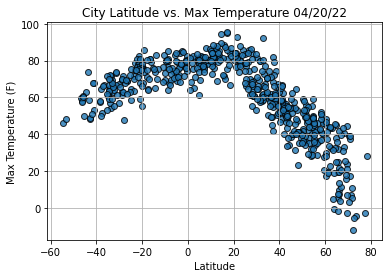

In [19]:
# Import time module

import time


# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather-data/Fig1.png")


# Show plot.

plt.show()

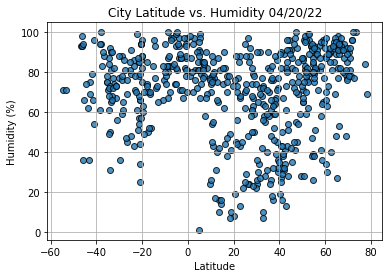

In [22]:
# Build the scatter plot for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather-data/Fig2.png")


# Show plot.

plt.show()

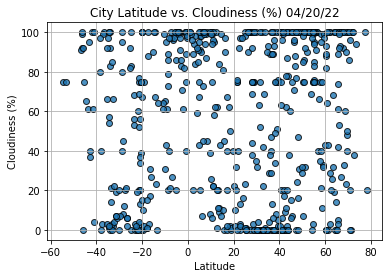

In [25]:
# Build the scatter plot for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather-data/Fig3.png")


# Show plot.

plt.show()

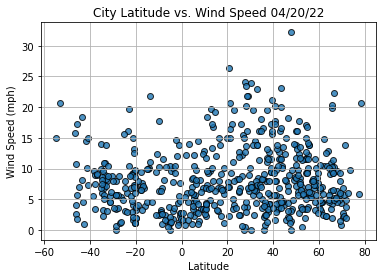

In [26]:
# Build the scatter plot for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather-data/Fig4.png")


# Show plot.

plt.show()